In [1]:
import os
import librosa
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import librosa.display
import numpy as np
import pretty_midi

Processing ./small_model/output_3.wav...


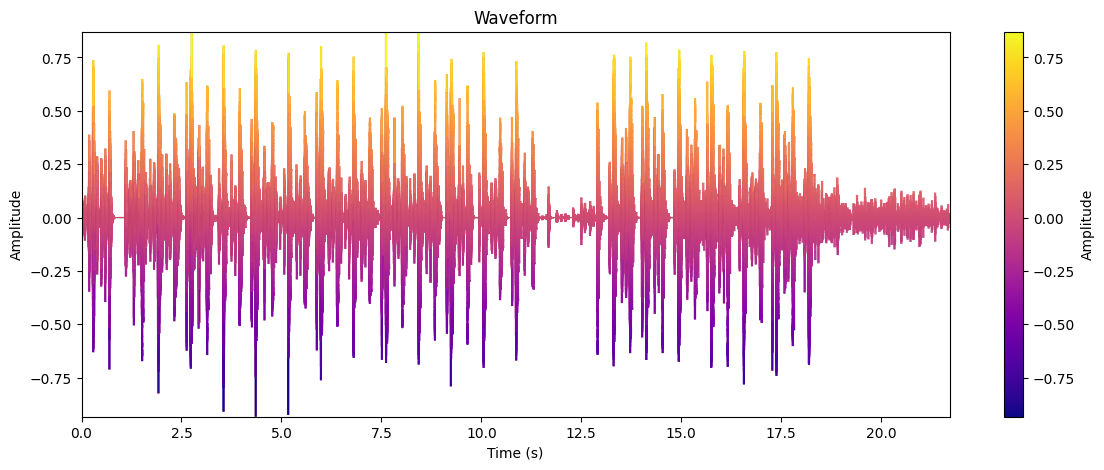

File: output_3.wav
Tempo: 73.828125 BPM
Spectral Centroids Shape: (936,)
Chroma Shape: (12, 936)
Mel Spectrogram Shape: (128, 936)
Processing ./small_model/output_2.wav...


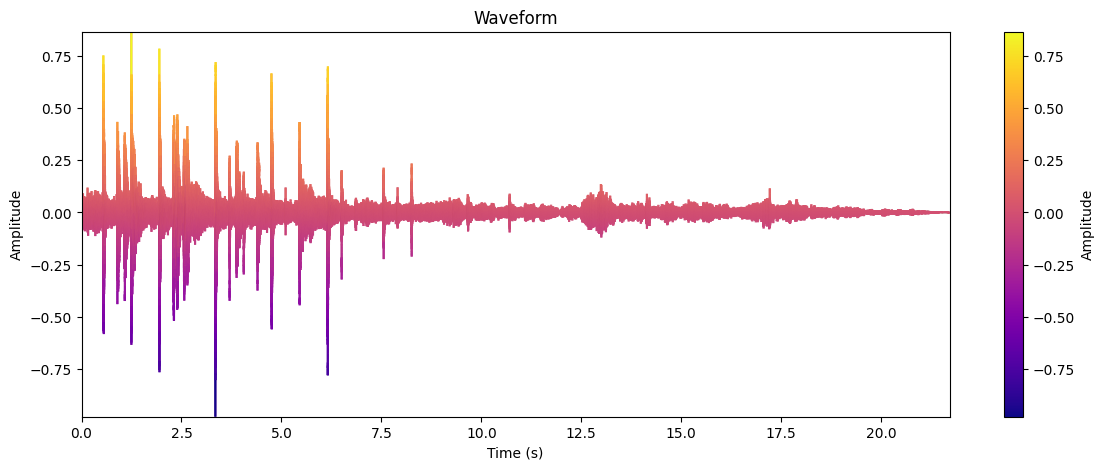

File: output_2.wav
Tempo: 86.1328125 BPM
Spectral Centroids Shape: (936,)
Chroma Shape: (12, 936)
Mel Spectrogram Shape: (128, 936)
Processing ./small_model/output_9.wav...


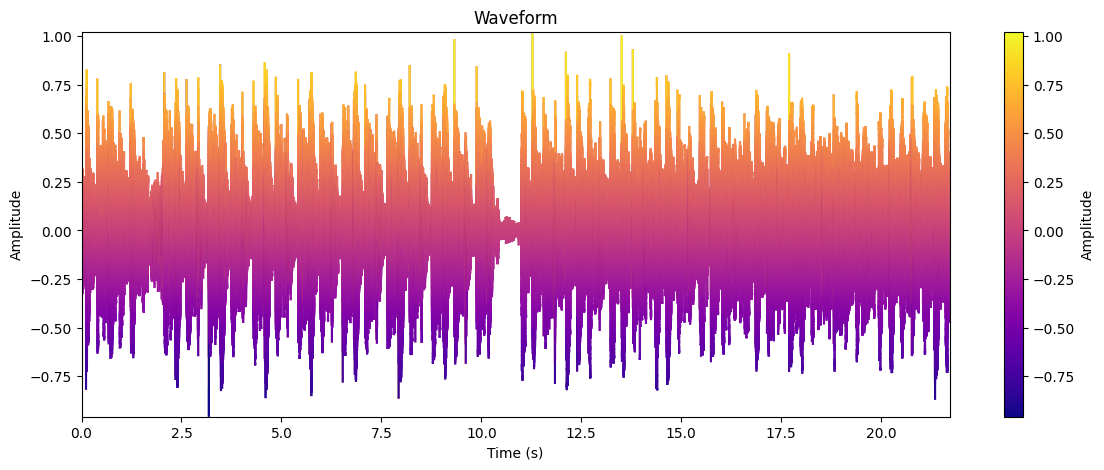

File: output_9.wav
Tempo: 107.666015625 BPM
Spectral Centroids Shape: (936,)
Chroma Shape: (12, 936)
Mel Spectrogram Shape: (128, 936)
Processing ./small_model/output_7.wav...


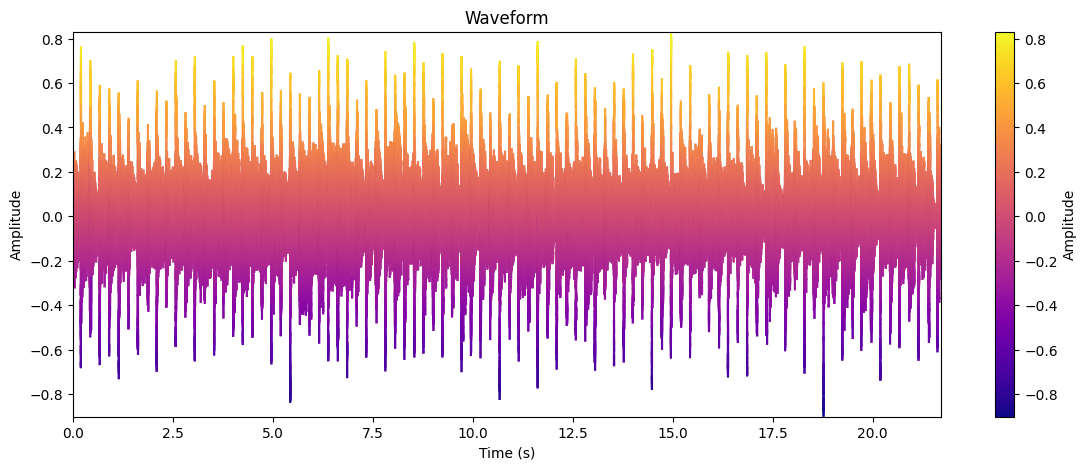

File: output_7.wav
Tempo: 123.046875 BPM
Spectral Centroids Shape: (936,)
Chroma Shape: (12, 936)
Mel Spectrogram Shape: (128, 936)
Processing ./small_model/output_5.wav...


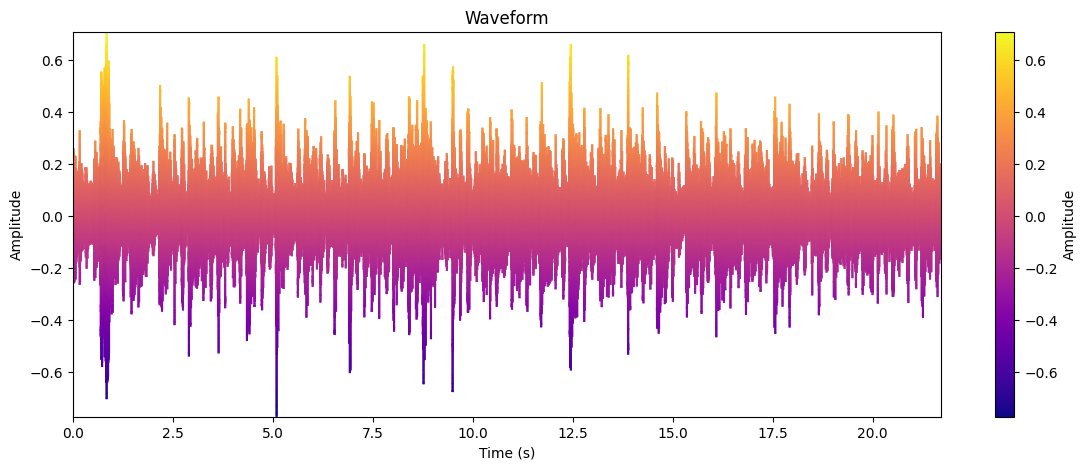

File: output_5.wav
Tempo: 161.4990234375 BPM
Spectral Centroids Shape: (936,)
Chroma Shape: (12, 936)
Mel Spectrogram Shape: (128, 936)
Processing ./small_model/output_6.wav...


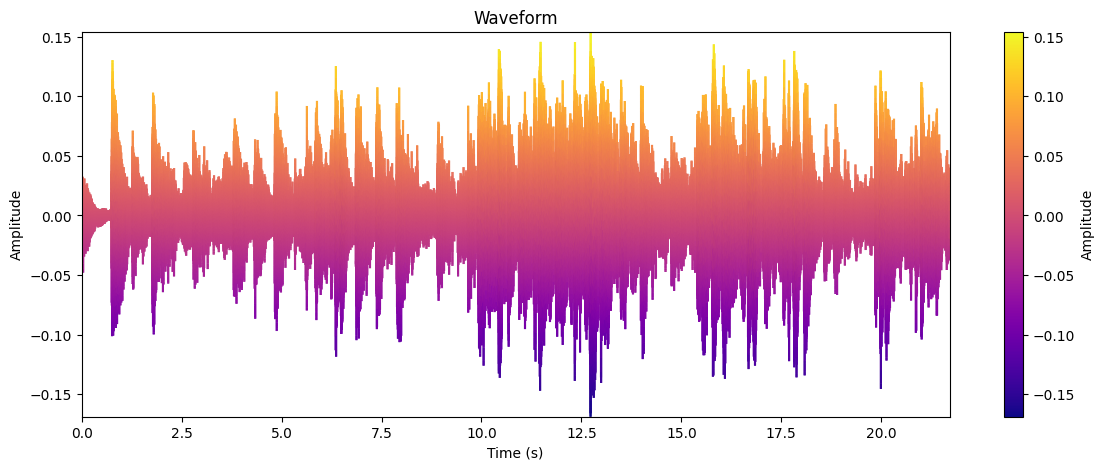

File: output_6.wav
Tempo: 117.45383522727273 BPM
Spectral Centroids Shape: (936,)
Chroma Shape: (12, 936)
Mel Spectrogram Shape: (128, 936)
Processing ./small_model/output_0.wav...


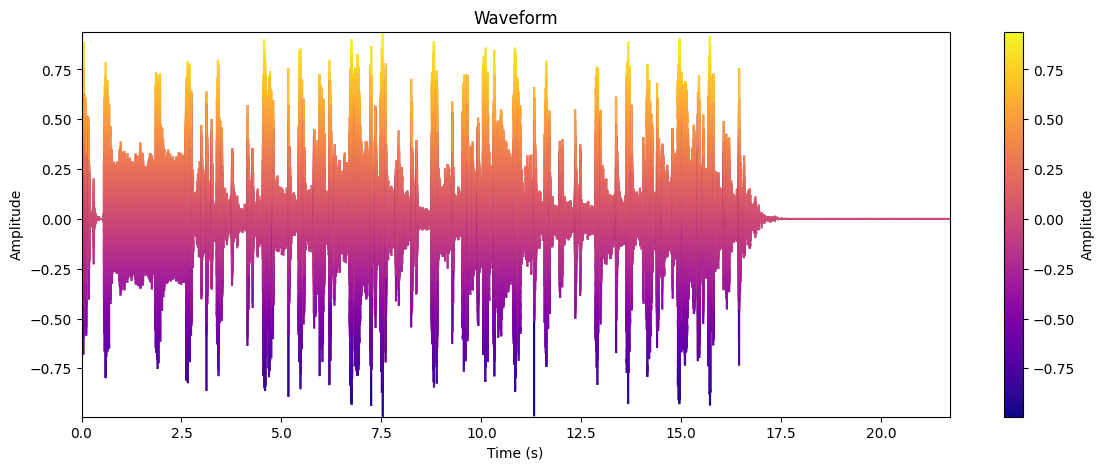

File: output_0.wav
Tempo: 117.45383522727273 BPM
Spectral Centroids Shape: (936,)
Chroma Shape: (12, 936)
Mel Spectrogram Shape: (128, 936)
Processing ./small_model/output_8.wav...


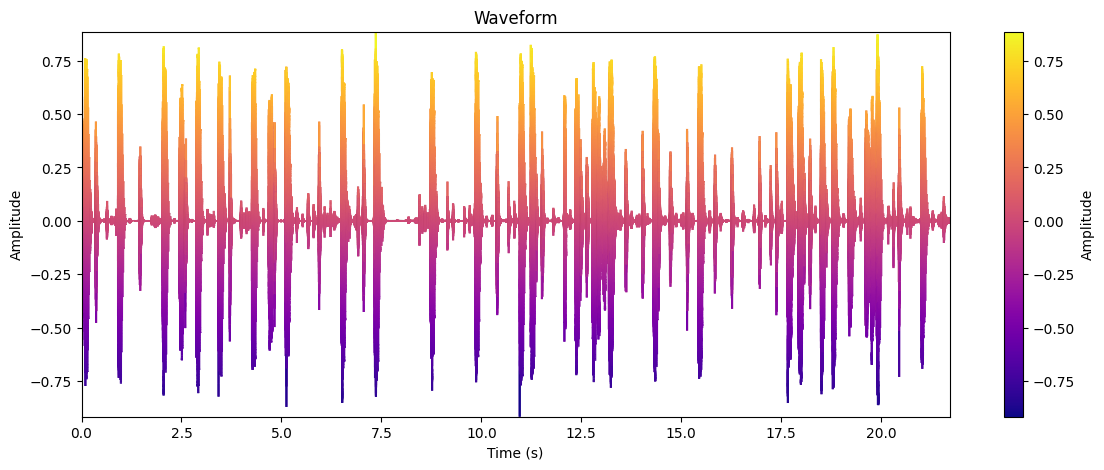

File: output_8.wav
Tempo: 107.666015625 BPM
Spectral Centroids Shape: (936,)
Chroma Shape: (12, 936)
Mel Spectrogram Shape: (128, 936)
Processing ./small_model/output_1.wav...


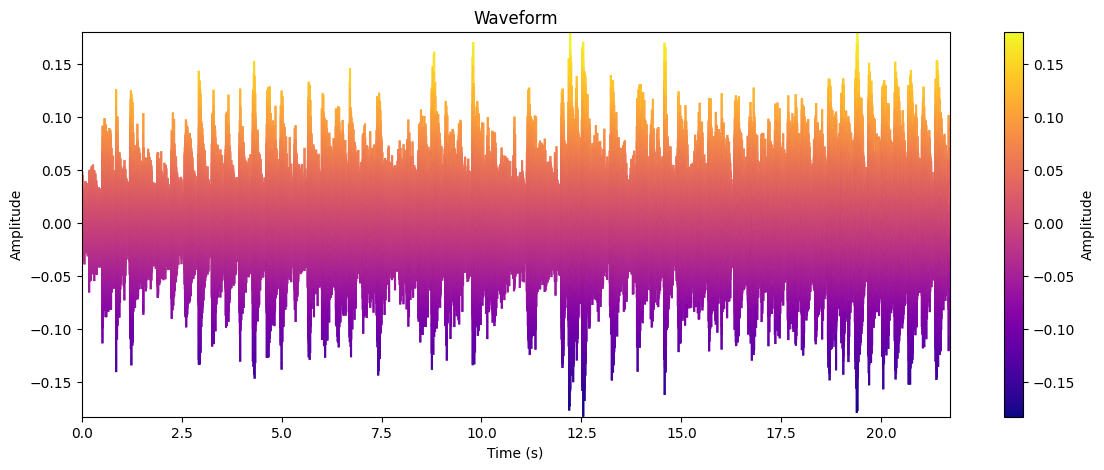

File: output_1.wav
Tempo: 172.265625 BPM
Spectral Centroids Shape: (936,)
Chroma Shape: (12, 936)
Mel Spectrogram Shape: (128, 936)
Processing ./small_model/output_4.wav...


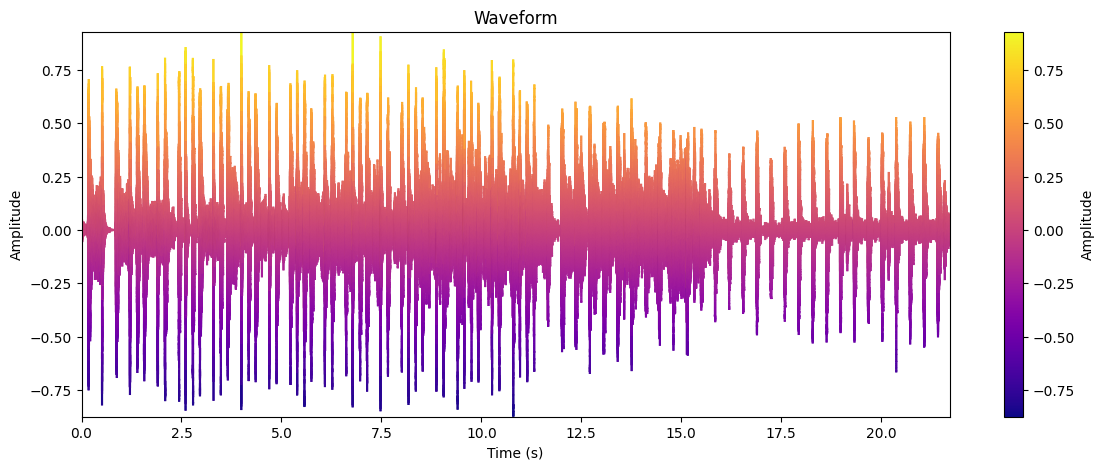

File: output_4.wav
Tempo: 172.265625 BPM
Spectral Centroids Shape: (936,)
Chroma Shape: (12, 936)
Mel Spectrogram Shape: (128, 936)


In [2]:
# Load the audio file
def load_audio(filename):
    y, sr = librosa.load(filename)
    return y, sr

# Plot the waveform
def plot_waveform(y, sr):
    plt.figure(figsize=(14, 5))

    # Generate time axis
    time = np.linspace(0, len(y) / sr, len(y))

    # Create points for line plot
    points = np.array([time, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    # Create a LineCollection
    lc = LineCollection(segments, cmap='plasma', norm=plt.Normalize(y.min(), y.max()))
    lc.set_array(y)

    plt.gca().add_collection(lc)
    
    # Set the limits of the plot to the limits of the data
    plt.xlim(time.min(), time.max())
    # plt.xlim(time.min(), 15)
    plt.ylim(y.min(), y.max())

    plt.title('Waveform')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.colorbar(lc, label='Amplitude')
    plt.show()



# Extract Tempo and Other Features
def extract_features(y, sr):
    # Tempo
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)

    # Spectral Centroid
    spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]

    # Chroma Frequencies
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)

    # Mel-Scaled Spectrogram
    mel_spect = librosa.feature.melspectrogram(y=y, sr=sr)

    return {
        'tempo': tempo,
        'spectral_centroids': spectral_centroids,
        'chroma': chroma,
        'mel_spectrogram': mel_spect
    }

# Main function
def analyze_audio(filename):
    y, sr = load_audio(filename)
    plot_waveform(y, sr)
    features = extract_features(y, sr)
    print("Extracted Features:")
    print(f"Tempo: {features['tempo']} BPM")
    # Print the shape of other features
    print(f"Spectral Centroids Shape: {features['spectral_centroids'].shape}")
    print(f"Chroma Shape: {features['chroma'].shape}")
    print(f"Mel Spectrogram Shape: {features['mel_spectrogram'].shape}")

# analyze_audio('./small_model/output_0.wav')


def process_directory(directory_path):
    # Iterate over all files in the directory
    for filename in os.listdir(directory_path):
        # Check for .wav extension
        if filename.endswith('.wav'):
            file_path = os.path.join(directory_path, filename)
            print(f"Processing {file_path}...")
            y, sr = librosa.load(file_path)
            plot_waveform(y, sr)
            features = extract_features(y, sr)
            print(f"File: {filename}")
            print(f"Tempo: {features['tempo']} BPM")
            print(f"Spectral Centroids Shape: {features['spectral_centroids'].shape}")
            print(f"Chroma Shape: {features['chroma'].shape}")
            print(f"Mel Spectrogram Shape: {features['mel_spectrogram'].shape}")


process_directory('./small_model/')

Processing ./medium_model/Untitled4.wav...


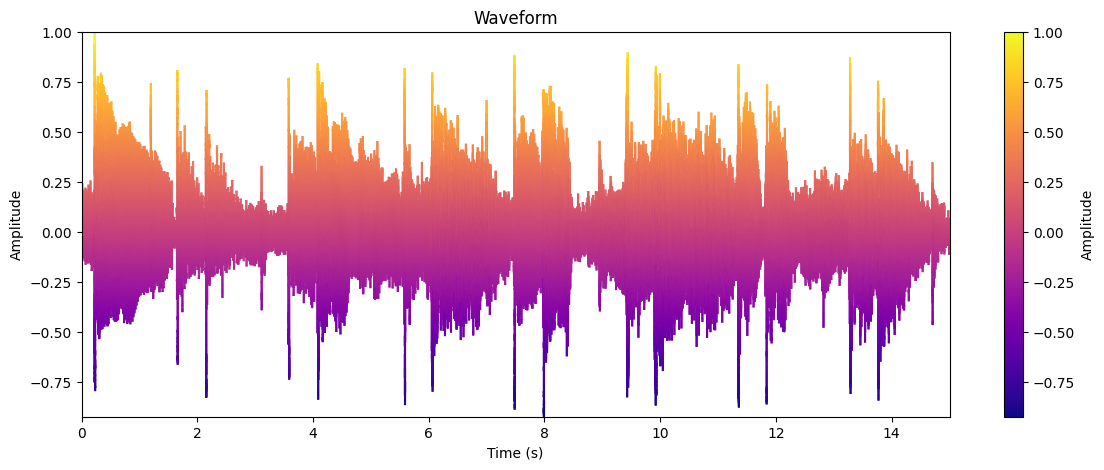

File: Untitled4.wav
Tempo: 61.5234375 BPM
Spectral Centroids Shape: (646,)
Chroma Shape: (12, 646)
Mel Spectrogram Shape: (128, 646)
Processing ./medium_model/Untitled7.wav...


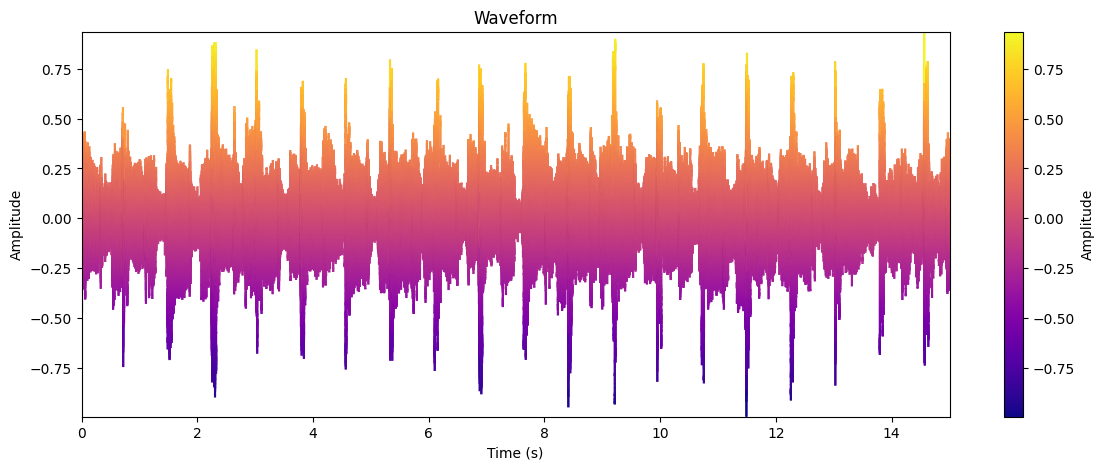

File: Untitled7.wav
Tempo: 151.99908088235293 BPM
Spectral Centroids Shape: (646,)
Chroma Shape: (12, 646)
Mel Spectrogram Shape: (128, 646)
Processing ./medium_model/Untitled6.wav...


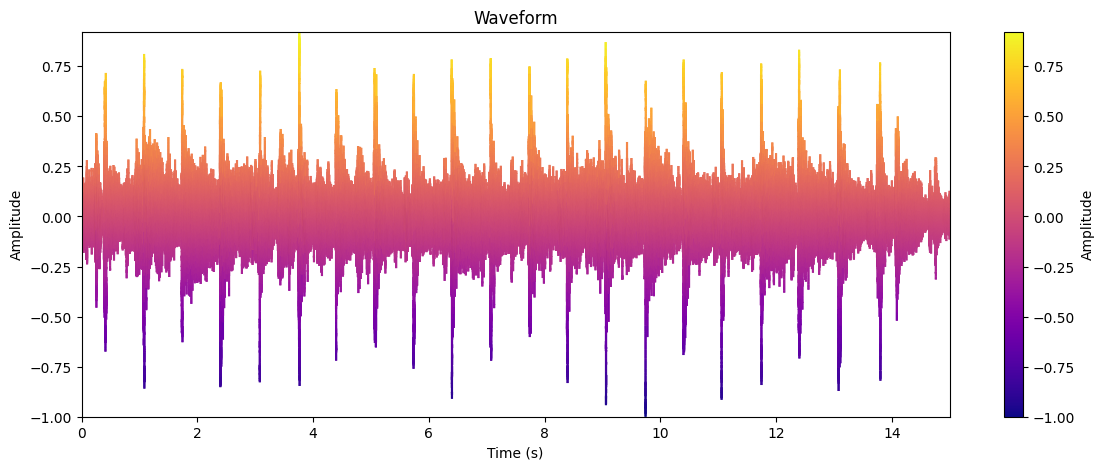

File: Untitled6.wav
Tempo: 89.10290948275862 BPM
Spectral Centroids Shape: (646,)
Chroma Shape: (12, 646)
Mel Spectrogram Shape: (128, 646)
Processing ./medium_model/Untitled3.wav...


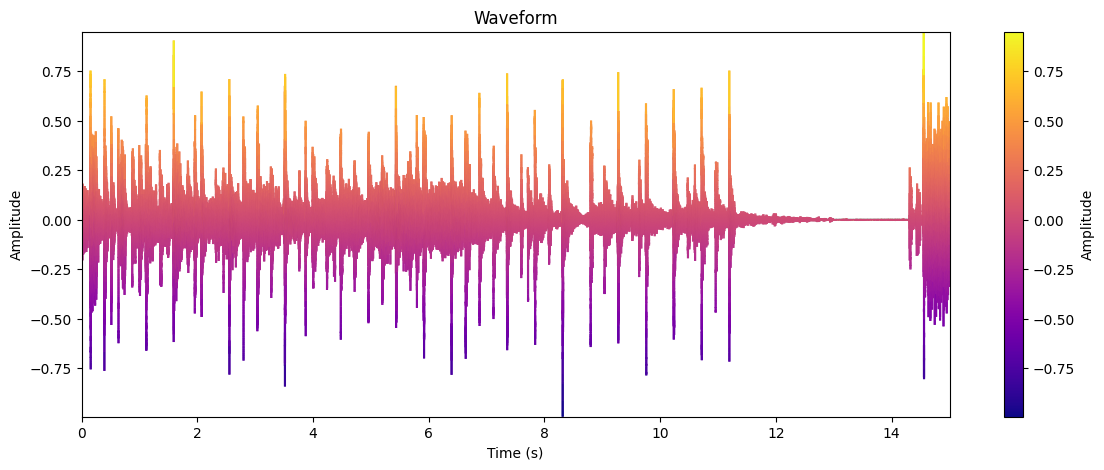

File: Untitled3.wav
Tempo: 123.046875 BPM
Spectral Centroids Shape: (646,)
Chroma Shape: (12, 646)
Mel Spectrogram Shape: (128, 646)
Processing ./medium_model/Untitled5.wav...


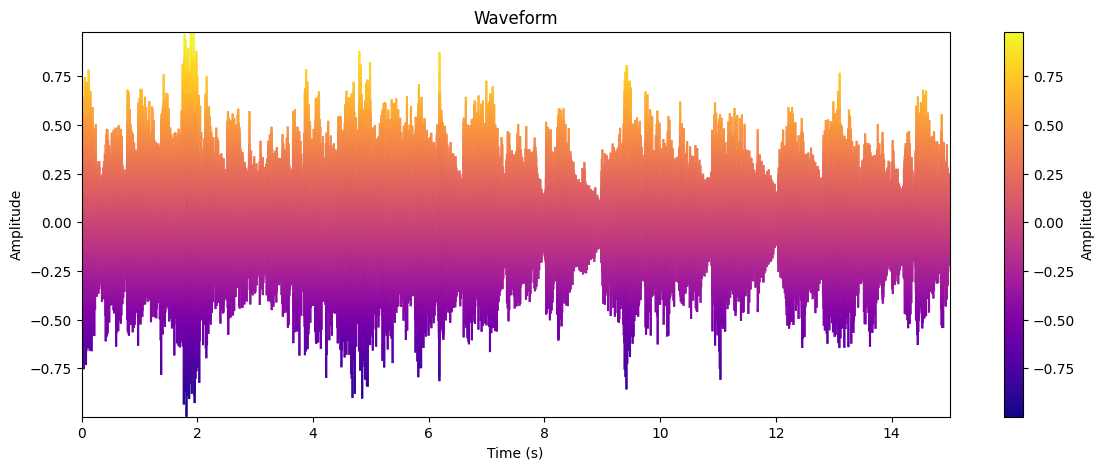

File: Untitled5.wav
Tempo: 151.99908088235293 BPM
Spectral Centroids Shape: (646,)
Chroma Shape: (12, 646)
Mel Spectrogram Shape: (128, 646)
Processing ./medium_model/Untitled.wav...


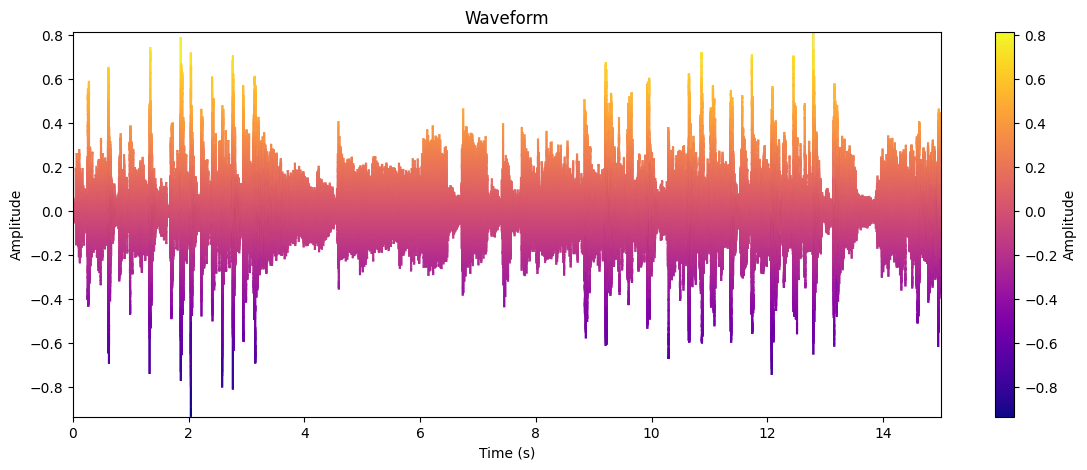

File: Untitled.wav
Tempo: 83.35433467741936 BPM
Spectral Centroids Shape: (646,)
Chroma Shape: (12, 646)
Mel Spectrogram Shape: (128, 646)
Processing ./medium_model/Untitled2.wav...


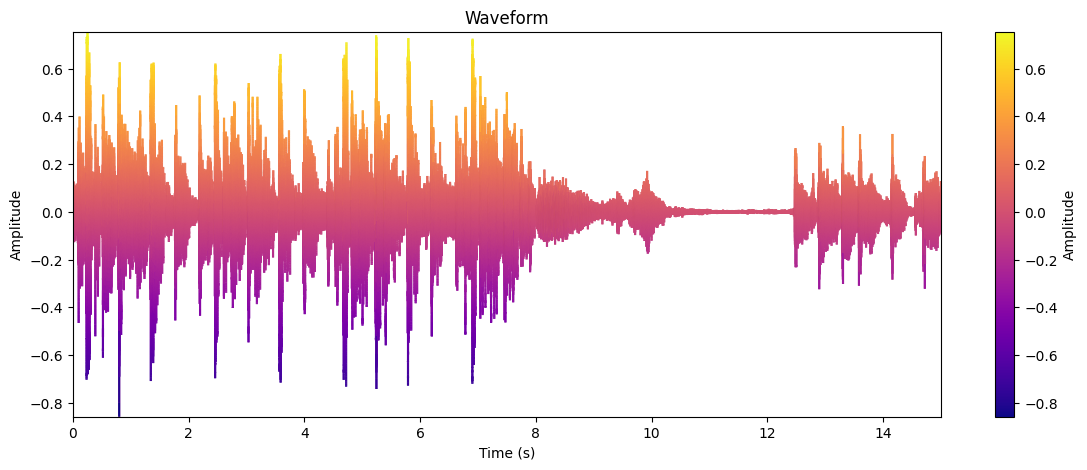

File: Untitled2.wav
Tempo: 143.5546875 BPM
Spectral Centroids Shape: (646,)
Chroma Shape: (12, 646)
Mel Spectrogram Shape: (128, 646)
Processing ./medium_model/Untitled1.wav...


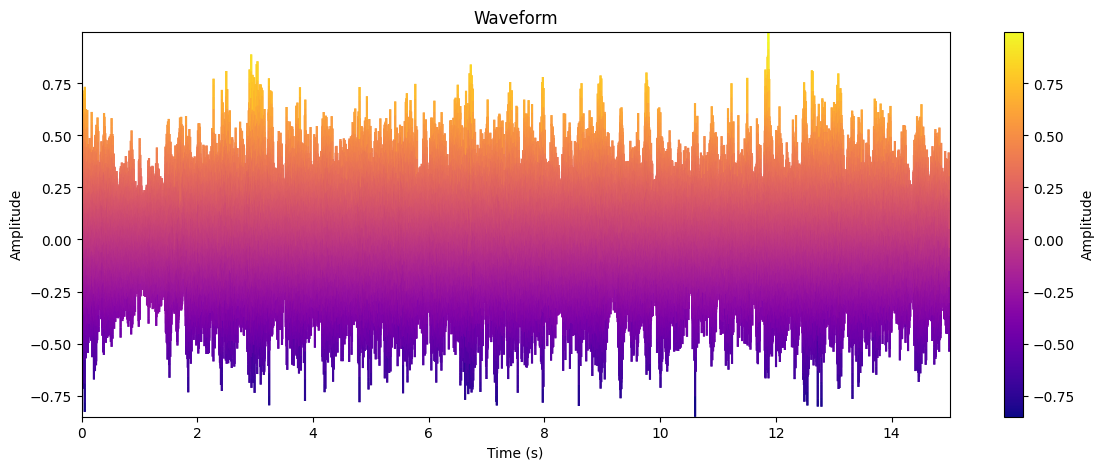

File: Untitled1.wav
Tempo: 95.703125 BPM
Spectral Centroids Shape: (646,)
Chroma Shape: (12, 646)
Mel Spectrogram Shape: (128, 646)


In [3]:
process_directory('./medium_model/')

Processing ./og_songs/Musette_BWV_Anh.126.wav...


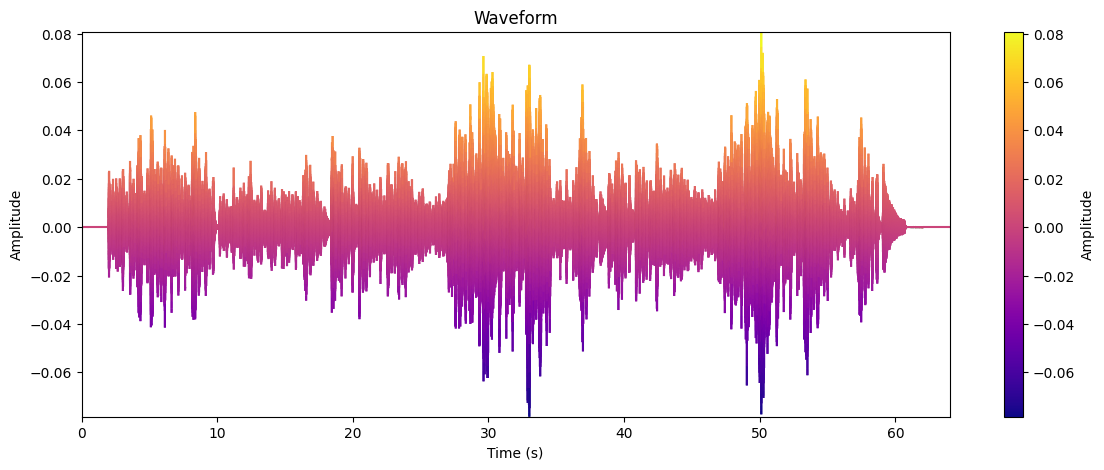

File: Musette_BWV_Anh.126.wav
Tempo: 117.45383522727273 BPM
Spectral Centroids Shape: (2757,)
Chroma Shape: (12, 2757)
Mel Spectrogram Shape: (128, 2757)


In [4]:
process_directory("./og_songs/")